import done
[ 9.91049872  8.18743905  9.82287745 11.14760338  5.72727391  9.8109001
  8.54258465 12.18149979  9.04835782  9.84895411 11.59792674  9.45940782
  7.08428931 11.85532064  7.79253168 11.83188756 10.16272357 10.54181126
  9.13688354 10.70686828  7.7010492   9.17306091 10.27706684  7.28636579
 10.41813442 10.41380356  8.0249055   9.94791793 11.20986821  9.80027157
  7.20668582  9.26949861  9.2808598  12.77886851  7.3090523  10.59907396
 11.46718608 10.53938919  6.03364993 13.7378175  11.16688743 13.33149243
  6.97805242  9.94482472  7.50750787  6.79651405  8.4144077   7.64088347
  7.40701434  9.18799212  6.60961647  5.6823706  11.4295269   6.21250362
  8.18888209 11.17232431  9.10953231 11.70534172  8.44447304  6.12371632
 10.34983027 11.2571332   9.57854435  8.7782511   6.98610415  6.42224924
 11.6757665  11.18385313  7.16631677 12.00283207 10.94350097  7.54190892
  8.73323217  9.39455605 13.56302231 10.79436845 15.27223082  9.62123412
 10.09744933  8.65562988 10.01335216 11.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

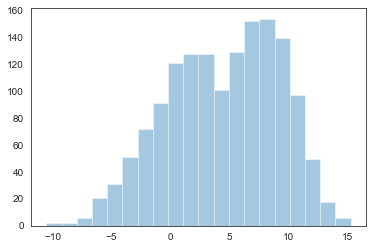

In [44]:
# import libraries

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
print("import done")



random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)
print(y2)

# For data visiualisation calculate left and right of the graph
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000) # to plot the data
sns.distplot(data, bins=20, kde=False)

In [42]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 2, tol=0.0000000000001, max_iter = 500)
gmm.fit(np.expand_dims(data, 1)) # Parameters: array-like, shape (n_samples, n_features), 1 dimension dataset so 1 feature
Gaussian_nr = 1
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Input Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))



Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0


Gaussian 1: μ = 1.8, σ = 3.8, weight = 0.62
Gaussian 2: μ = 8.8, σ = 2.2, weight = 0.38


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


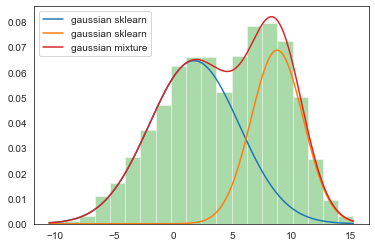

In [43]:
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu, sd, p))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='gaussian sklearn');
    Gaussian_nr += 1
sns.distplot(data, bins=20, kde=False, norm_hist=True)
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x]) #gmm gives log probability, hence the exp() function
plt.plot(x, gmm_sum, label='gaussian mixture');
plt.legend();